This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Inferior longitudinal fasciculus L: 4.92864564614e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 4.87688877568e-05
Region: Inferior longitudinal fasciculus L
0.00264932407516
0.0944275020962
0.118203621541
Standard deviation of label Inferior longitudinal fasciculus R: 4.76260150739e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 4.7365344258e-05
Region: Inferior longitudinal fasciculus R
0.00084059590427
0.0307912690246
0.170213090052
Standard deviation of label Superior longitudinal fasciculus L: 5.0463513251e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 4.96108560473e-05
Region: Superior longitudinal fasciculus L
0.00233264046783
0.0250406965064
0.313210575759
Standard deviation of label Superior longitudinal fasciculus R: 4.36524205178e-05
Mo

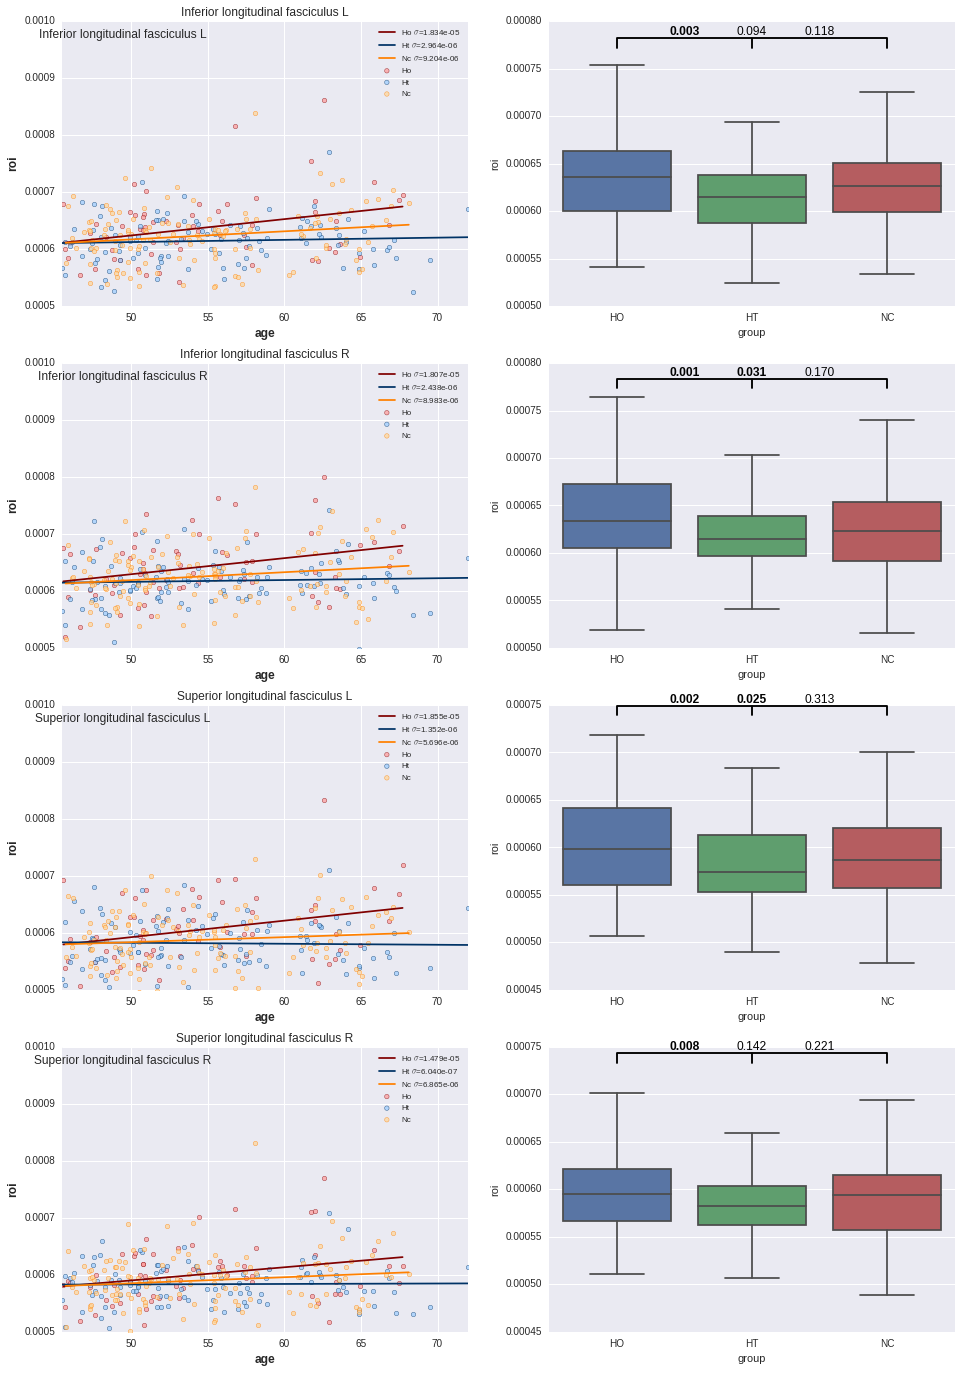

In [4]:
regions = range(12,16)
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
names = {0: 'Anterior thalamic radiation L',
 1: 'Anterior thalamic radiation R',
 2: 'Corticospinal tract L',
 3: 'Corticospinal tract R',
 4: 'Cingulum (cingulate gyrus) L',
 5: 'Cingulum (cingulate gyrus) R',
 6: 'Cingulum (hippocampus) L',
 7: 'Cingulum (hippocampus) R',
 8: 'Forceps major',
 9: 'Forceps minor',
 10: 'Inferior fronto-occipital fasciculus L',
 11: 'Inferior fronto-occipital fasciculus R',
 12: 'Inferior longitudinal fasciculus L',
 13: 'Inferior longitudinal fasciculus R',
 14: 'Superior longitudinal fasciculus L',
 15: 'Superior longitudinal fasciculus R',
 16: 'Uncinate fasciculus L',
 17: 'Uncinate fasciculus R',
 18: 'Superior longitudinal fasciculus (temporal part) L',
 19: 'Superior longitudinal fasciculus (temporal part) R'}

data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/roivalues/roivalues_tracts_tbss_RD_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)
values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.0005,0.0010])